# Deconvolution with DSEA

For a quick start, we will deconvolve the distribution of Iris plant types in the famous IRIS data set.

### Outline

- Split the IRIS data into a training and test set
- Deconvolve the test set
- Plot the result

### Further Reference

`import cherenkovdeconvolution` in an interactive Python shell to get access to the documentation via

      help(cherenkovdeconvolution.dsea)

In [1]:
import numpy as np

# load the data
from sklearn.datasets import load_iris
iris = load_iris()

# randomly split into training set and data to be deconvolved
np.random.seed(42)
p_iris = np.random.permutation(len(iris.target))
X_data  = iris.data[p_iris[0:50], :]
X_train = iris.data[p_iris[50:150], :]
y_train = iris.target[p_iris[50:150]]

# also obtain the true target distribution for validation (we are estimating this one)
f_true = np.bincount(iris.target[p_iris[0:50]])

In [2]:
# workaround if you have not yet installed CherenkovDeconvolution.py but want to try it from this notebook
import sys
sys.path.append("..")

In [3]:
from cherenkovdeconvolution import dsea
from sklearn.naive_bayes import GaussianNB

# deconvolve with a Naive Bayes classifier
f_est = dsea(X_data, X_train, y_train, GaussianNB())

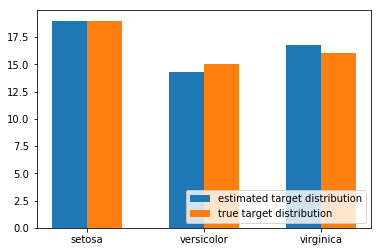

In [4]:
import matplotlib.pyplot as plt

# prepare plot
fig, ax = plt.subplots()
index = np.arange(3)
barwidth = .3

# add bar plots
ax.bar(index,            f_est,  barwidth, label='estimated target distribution')
ax.bar(index + barwidth, f_true, barwidth, label='true target distribution')
ax.legend(loc = 'lower right')

# show plot
plt.xticks(index + barwidth / 2, iris.target_names)
plt.show()